In [6]:
import csv  # For saving data
import requests  # For sending request to websites
from lxml import html  # For parsing data


def get_response(query_string):
    """This function will send a request to the google server with the given
    query_string as parameter and returns the response object.

    Args:
    query_string (str): Keyword used to search hotels.

    Returns:
    Response : response object received from google server
    """
    url = "https://www.google.com/travel/search"

    headers = {
        'authority': 'www.google.com',
        'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image'
                  '/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange'
                  ';v=b3;q=0.7',
        'accept-language': 'en-GB,en;q=0.9',
        'sec-ch-ua': '"Google Chrome";v="119", "Chromium";v="119",'
                     '"Not?A_Brand";v="24"',
        'sec-ch-ua-arch': '"x86"',
        'sec-ch-ua-bitness': '"64"',
        'sec-ch-ua-full-version': '"119.0.6045.123"',
        'sec-ch-ua-full-version-list': '"Google Chrome";v="119.0.6045.123",'
                                       '"Chromium";v="119.0.6045.123", "Not?A_Brand";v="24.0.0.0"',
        'sec-ch-ua-mobile': '?0',
        'sec-ch-ua-model': '""',
        'sec-ch-ua-platform': '"Linux"',
        'sec-ch-ua-platform-version': '"6.2.0"',
        'sec-ch-ua-wow64': '?0',
        'sec-fetch-dest': 'document',
        'sec-fetch-mode': 'navigate',
        'sec-fetch-site': 'none',
        'sec-fetch-user': '?1',
        'upgrade-insecure-requests': '1',
        'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 '
                      '(KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36',
    }

    params = {
        'q': query_string,
    }

    response = requests.get(url=url, headers=headers, params=params)
    return response


def parse_response(response):
    """This function parses the response received from the google server,
    finds all the hotel data from the html and returns this data as
    list of dictionaries.

    Args:
    response (response_object): Response of request send to google server

    Returns:
    list: Returns a list of dictionaries where each dictionary contains
    data of a particular hotel.
    """
    parser = html.fromstring(response.text)
    hotels_data = []
    hotels_list = parser.xpath("//div[@jsname='mutHjb']")
    for hotel in hotels_list:
        name = hotel.xpath(".//h2[@class='BgYkof ogfYpf ykx2he']/text()")
        price = hotel.xpath(
            ".//span[@jsaction='mouseenter:JttVIc;mouseleave:VqIRre;']//text()"
        )[0]
        rating = hotel.xpath(".//span[@class='ta47le ']/@aria-label")
        amenities = get_amenities(hotel)
        hotel_data = {
            "name": convert_list_to_str(name),
            "price": price,
            "rating": convert_list_to_str(rating),
            "amenities": convert_list_to_str(amenities, " | "),
        }
        hotels_data.append(hotel_data)
    return hotels_data


def get_amenities(hotel_html):
    """This function extracts the amenities of a hotel from its HTML content.

    Args:
    hotel_html (html_element): html_element that represents a hotel

    Returns:
    list: each element is an amenity provided by the hotel
    """
    amenities = hotel_html.xpath(".//span[@class='lXJaOd']/text()")
    amenities_str = convert_list_to_str(amenities)  # Add this line for debugging
    amenities_list = amenities_str.split(":")  # Add this line for debugging
    if len(amenities_list) >= 2:
        amenities_list = amenities_list[1].split(",")
        return amenities_list
    else:
        return []



def convert_list_to_str(input_list, separator=" "):
    """This function converts a list of strings to a single string joined by a
    separator.

    Args:
    input_list (list): List of strings to be combined
    separator (str, optional): The separator to be used between the
    strings. Defaults to " ".

    Returns:
    str: A single string formed by concatenating the elements of the input list
    """
    cleaned_elements = []
    for element in input_list:
        if element == " ":
            continue
        cleaned_element = element.replace("\\", "")
        cleaned_elements.append(cleaned_element)
    return separator.join(cleaned_elements)


def save_data(data):
    """This function saves the hotel data to a csv file

    Args:
    data (list): A list of dictionaries where each dictionary contains
    data of a particular hotel.
    """
    if not data:
        return
    fields = data[0].keys()
    with open("Hotels1.csv", "w", encoding="utf-8", newline="") as file:
        dict_writer = csv.DictWriter(file, fields)
        dict_writer.writeheader()
        dict_writer.writerows(data)


def main():
    query_string = "Yercaud"
    response = get_response(query_string)
    if response.status_code == 200:
        print("Response received successfully.")
        data = parse_response(response)
        print("Data parsed successfully.")
        save_data(data)
        print("Data saved to CSV.")
    else:
        print("Invalid Response")



if __name__ == "__main__":
    main()


Response received successfully.
Data parsed successfully.
Data saved to CSV.


                                             name  score
1                                 Hotel Shevaroys     18
0                TGI Star Holiday Resort, Yercaud     14
4              INDeco's Lake Forest Hotel Yercaud     14
11                    Clifton Inn Resort, Yercaud     14
2                           Breezy Land Residency     13
3                         Yercaud Hideaway Resort     13
18                                   Oyla Cottage     12
10                          Saffron Villa Yercaud     12
7                             Green Woods,Yercaud     12
15                            Cottages in yercaud     10
16  Eesha Garden Yercaud Cottages By Bookingmania     10
6                                 iHotels Yercaud      9
12                           Chill Breeze Resorts      9
13                            Summer House Resort      9
14                    Cliffhanger retreat yercaud      9
5                       Cliff View Resort Yercaud      6
17                             

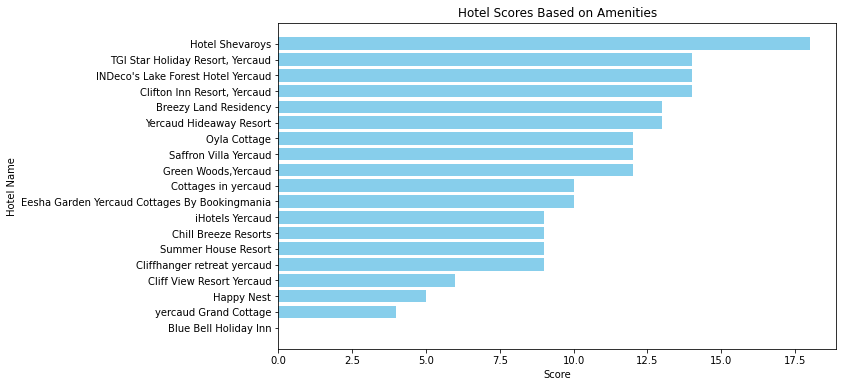

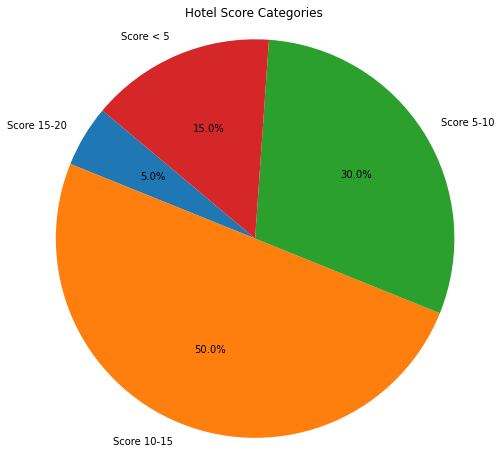

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Hotels1.csv')

amenity_scores = {
    "Kitchen in some rooms":5,
    "Fitness center":4,
    "Free Wi-Fi": 4,
    "Outdoor pool": 5,
    "Spa": 4,
    "Local shuttle":3,
    "Restaurant": 3,
    "Room service": 2,
    "Pet-friendly":1,

}

def calculate_score(amenities_str):
    amenities = amenities_str.split(" | ")
    score = sum(amenity_scores.get(amenity.strip(), 0) for amenity in amenities)
    return score

df['score'] = df['amenities'].fillna('').apply(calculate_score)

ranked_hotels = df.sort_values(by='score', ascending=False)

print(ranked_hotels[['name', 'score']])

plt.figure(figsize=(10, 6))

plt.barh(ranked_hotels['name'], ranked_hotels['score'], color='skyblue')
plt.xlabel('Score')
plt.ylabel('Hotel Name')
plt.title('Hotel Scores Based on Amenities')

plt.gca().invert_yaxis()
score_categories = {
    'Score > 20': df[df['score'] > 20],
    'Score 15-20': df[(df['score'] >= 15) & (df['score'] <= 20)],
    'Score 10-15': df[(df['score'] >= 10) & (df['score'] < 15)],
    'Score 5-10': df[(df['score'] >= 5) & (df['score'] < 10)],
    'Score < 5': df[df['score'] < 5]
}

category_counts = {category: len(hotels) for category, hotels in score_categories.items()}

category_counts = {category: count for category, count in category_counts.items() if count > 0}
plt.savefig('ameneties graph.jpg')

plt.figure(figsize=(8, 8))
plt.pie(category_counts.values(), labels=category_counts.keys(), autopct='%1.1f%%', startangle=140)

plt.axis('equal')

plt.title('Hotel Score Categories')
plt.savefig('ameneties_analysis.jpg')
plt.show()